In [38]:
!pip install lifelines

In [58]:
# Importar pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import WeibullAFTFitter, CoxPHFitter, KaplanMeierFitter

In [59]:
# Carregar o conjunto de dados "cancer" do pacote lifelines
from lifelines.datasets import load_lung
cancer = load_lung()

In [60]:
cancer

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
223,1.0,188,0,77,1,1.0,80.0,60.0,NaN,3.0
224,13.0,191,0,39,1,0.0,90.0,90.0,2350.0,-5.0
225,32.0,105,0,75,2,2.0,60.0,70.0,1025.0,5.0
226,6.0,174,0,66,1,1.0,90.0,100.0,1075.0,1.0


In [61]:
# Limpeza dos dados: remover observações com dados ausentes
cancer = cancer.dropna(axis=0)

In [62]:
cancer.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,0,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0


In [63]:
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
inst,167.0,10.706587,8.167900,1.0,3.0,11.0,15.0,32.0
time,167.0,309.934132,209.435591,5.0,174.5,268.0,419.5,1022.0
status,167.0,0.718563,0.451053,0.0,0.0,1.0,1.0,1.0
age,167.0,62.568862,9.210706,39.0,57.0,64.0,70.0,82.0
sex,167.0,1.383234,0.487637,1.0,1.0,1.0,2.0,2.0
ph.ecog,167.0,0.958084,0.731011,0.0,0.0,1.0,1.0,3.0
ph.karno,167.0,82.035928,12.778885,50.0,70.0,80.0,90.0,100.0
pat.karno,167.0,79.580838,15.104188,30.0,70.0,80.0,90.0,100.0
meal.cal,167.0,929.125749,413.489837,96.0,619.0,975.0,1162.5,2600.0
wt.loss,167.0,9.718563,13.378587,-24.0,0.0,7.0,15.0,68.0


In [64]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 1 to 227
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   inst       167 non-null    float64
 1   time       167 non-null    int64  
 2   status     167 non-null    int64  
 3   age        167 non-null    int64  
 4   sex        167 non-null    int64  
 5   ph.ecog    167 non-null    float64
 6   ph.karno   167 non-null    float64
 7   pat.karno  167 non-null    float64
 8   meal.cal   167 non-null    float64
 9   wt.loss    167 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 14.4 KB


In [65]:
# Ajustar o modelo de Weibull
weibull_model = WeibullAFTFitter()
weibull_model.fit(cancer,
                  duration_col='time',
                  event_col='status',
                  formula="age + sex + meal.cal")

<lifelines.WeibullAFTFitter: fitted with 167 total observations, 47 right-censored observations>

In [66]:
# Resumo do modelo de Weibull
print(weibull_model.summary)

                       coef   exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                   
lambda_ Intercept  6.162019  474.384684  0.650042        4.887960   
        age       -0.010518    0.989537  0.008236       -0.026661   
        sex        0.343966    1.410531  0.149233        0.051474   
        meal.cal   0.000085    1.000085  0.000182       -0.000272   
rho_    Intercept  0.299505    1.349191  0.072900        0.156623   

                   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
param   covariate                                                             
lambda_ Intercept        7.436078           132.682569          1696.084350   
        age              0.005625             0.973691             1.005641   
        sex              0.636458             1.052822             1.889776   
        meal.cal         0.000442             0.999728             1.000443   
rho_    Intercept        0.442387         

In [67]:
# Ajustar o modelo de Cox
cox_model = CoxPHFitter()
cox_model.fit(cancer,
              duration_col='time',
              event_col='status',
              formula="age + sex + meal.cal")

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>

In [68]:
# Resumo do modelo de Cox
print(cox_model.summary)

               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
age        0.016086   1.016216  0.011139       -0.005747        0.037919   
sex       -0.461405   0.630397  0.199897       -0.853195       -0.069614   
meal.cal  -0.000117   0.999883  0.000248       -0.000604        0.000370   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
age                   0.994270             1.038647     0.0  1.444081   
sex                   0.426051             0.932753     0.0 -2.308215   
meal.cal              0.999396             1.000370     0.0 -0.472757   

                  p  -log2(p)  
covariate                      
age        0.148716  2.749367  
sex        0.020987  5.574350  
meal.cal   0.636386  0.652025  


In [69]:
# Comparar os dois modelos (AIC para ambos os modelos)
weibull_aic = weibull_model.AIC_
cox_aic = cox_model.AIC_partial_

In [70]:
print("AIC do modelo Weibull:", weibull_aic)
print("AIC do modelo Cox:", cox_aic)

AIC do modelo Weibull: 1683.5438646621665
AIC do modelo Cox: 1013.1259087260723


In [71]:
# Análise de sobrevivência - Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(durations=cancer['time'], event_observed=cancer['status'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 167 total observations, 47 right-censored observations>

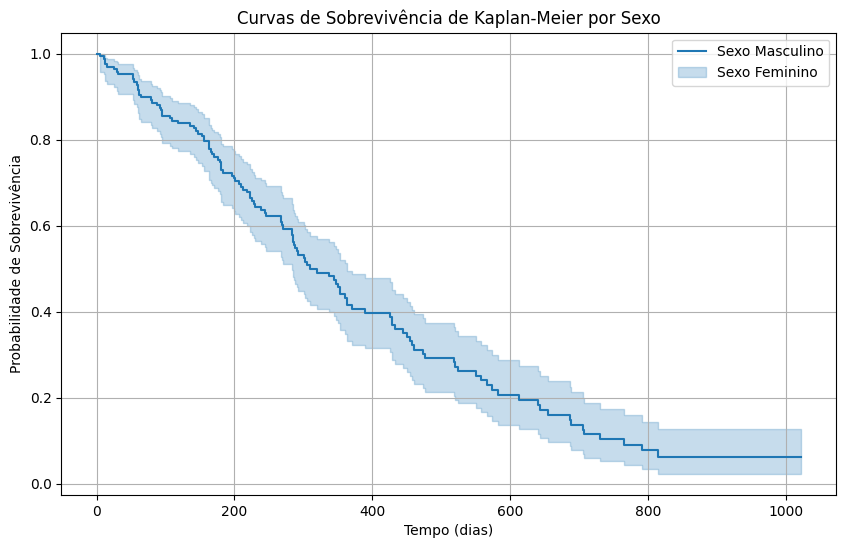

In [72]:
# Visualização das curvas de sobrevivência de Kaplan-Meier
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title("Curvas de Sobrevivência de Kaplan-Meier por Sexo")
plt.xlabel("Tempo (dias)")
plt.ylabel("Probabilidade de Sobrevivência")
plt.legend(["Sexo Masculino", "Sexo Feminino"])
plt.grid(True)
plt.show()

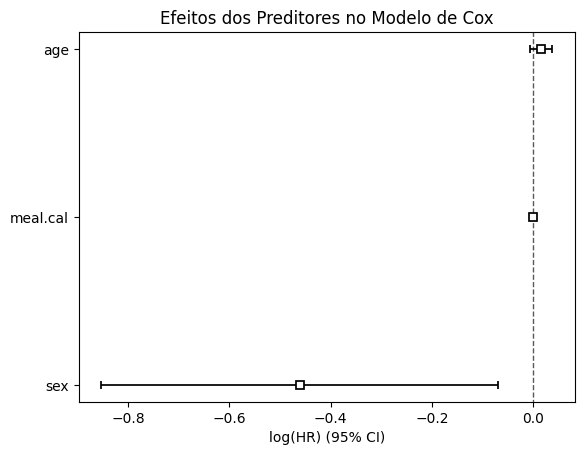

In [73]:
# Visualização dos efeitos dos preditores no modelo de Cox
cox_model.plot()
plt.title("Efeitos dos Preditores no Modelo de Cox")
plt.show()


In [74]:
# Visualização dos efeitos dos preditores no modelo de Weibull
# Obter os valores preditos do modelo Weibull
cancer['predicted_survival'] = weibull_model.predict_expectation(cancer)

<ipython-input-74-59fba67dd269>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer['predicted_survival'] = weibull_model.predict_expectation(cancer)


In [75]:
# Modificar a variável 'sex' para ser um fator com labels descritivos
cancer['sex'] = cancer['sex'].map({1: 'Masculino', 2: 'Feminino'})

<ipython-input-75-888f0fd74935>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer['sex'] = cancer['sex'].map({1: 'Masculino', 2: 'Feminino'})


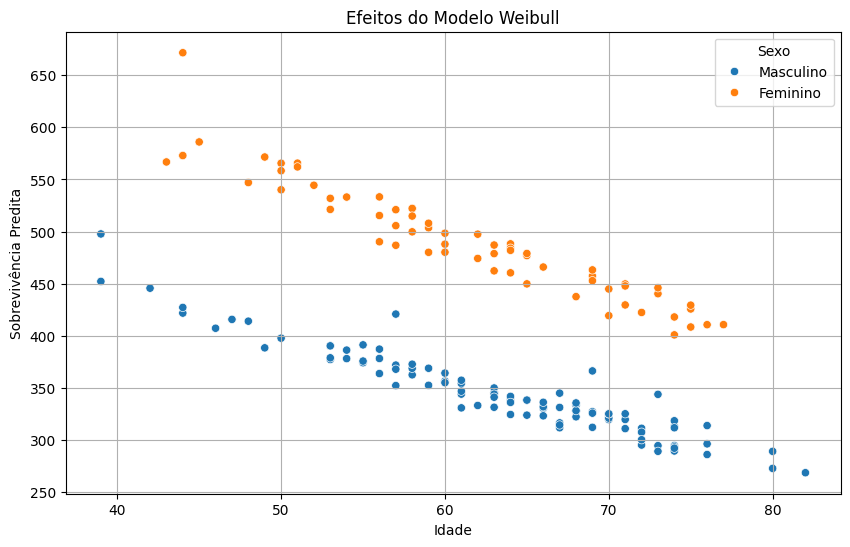

In [76]:
# Criar um gráfico de dispersão para visualizar os efeitos do modelo Weibull
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='predicted_survival', hue='sex', data=cancer)
plt.title("Efeitos do Modelo Weibull")
plt.xlabel("Idade")
plt.ylabel("Sobrevivência Predita")
plt.legend(title="Sexo")
plt.grid(True)
plt.show()